In [75]:
from typing_extensions import TypedDict, Annotated, List, Literal
from langchain_core.messages import AnyMessage, AIMessage, HumanMessage, SystemMessage
from langgraph.graph import add_messages
from typing import Dict, List, Optional, Union, Literal
from pydantic import BaseModel, Field
from IPython.display import Image, display 
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages

In [76]:
frontend_code = """
'I\'ll help you create a basic e-commerce site using React, with features like product listing, cart functionality, and a checkout process.\n\n<boltArtifact id="ecommerce-site" title="E-commerce Site with React">\n<boltAction type="file" filePath="package.json">\n{\n  "name": "ecommerce-site",\n  "private": true,\n  "version": "0.0.0",\n  "type": "module",\n  "scripts": {\n    "dev": "vite",\n    "build": "vite build",\n    "preview": "vite preview"\n  },\n  "dependencies": {\n    "react": "^18.2.0",\n    "react-dom": "^18.2.0",\n    "react-router-dom": "^6.14.2",\n    "react-icons": "^4.10.1",\n    "@reduxjs/toolkit": "^1.9.5",\n    "react-redux": "^8.1.1",\n    "styled-components": "^6.0.4"\n  },\n  "devDependencies": {\n    "@types/react": "^18.2.15",\n    "@types/react-dom": "^18.2.7",\n    "@vitejs/plugin-react": "^4.0.3",\n    "vite": "^4.4.6"\n  }\n}\n</boltAction>\n\n<boltAction type="file" filePath="src/main.jsx">\nimport React from \'react\'\nimport ReactDOM from \'react-dom/client\'\nimport { Provider } from \'react-redux\'\nimport { BrowserRouter } from \'react-router-dom\'\nimport App from \'./App\'\nimport { store } from \'./store\'\nimport \'./index.css\'\n\nReactDOM.createRoot(document.getElementById(\'root\')).render(\n  <React.StrictMode>\n    <Provider store={store}>\n      <BrowserRouter>\n        <App />\n      </BrowserRouter>\n    </Provider>\n  </React.StrictMode>\n)\n</boltAction>\n\n<boltAction type="file" filePath="src/App.jsx">\nimport { Routes, Route } from \'react-router-dom\'\nimport Navbar from \'./components/Navbar\'\nimport Home from \'./pages/Home\'\nimport Products from \'./pages/Products\'\nimport ProductDetail from \'./pages/ProductDetail\'\nimport Cart from \'./pages/Cart\'\nimport Checkout from \'./pages/Checkout\'\n\nfunction App() {\n  return (\n    <>\n      <Navbar />\n      <Routes>\n        <Route path="/" element={<Home />} />\n        <Route path="/products" element={<Products />} />\n        <Route path="/product/:id" element={<ProductDetail />} />\n        <Route path="/cart" element={<Cart />} />\n        <Route path="/checkout" element={<Checkout />} />\n      </Routes>\n    </>\n  )\n}\n\nexport default App\n</boltAction>\n\n<boltAction type="file" filePath="src/store/index.js">\nimport { configureStore } from \'@reduxjs/toolkit\'\nimport cartReducer from \'./cartSlice\'\n\nexport const store = configureStore({\n  reducer: {\n    cart: cartReducer\n  }\n})\n</boltAction>\n\n<boltAction type="file" filePath="src/store/cartSlice.js">\nimport { createSlice } from \'@reduxjs/toolkit\'\n\nconst cartSlice = createSlice({\n  name: \'cart\',\n  initialState: {\n    items: [],\n    total: 0\n  },\n  reducers: {\n    addToCart: (state, action) => {\n      const existingItem = state.items.find(item => item.id === action.payload.id)\n      if (existingItem) {\n        existingItem.quantity++\n      } else {\n        state.items.push({ ...action.payload, quantity: 1 })\n      }\n      state.total = state.items.reduce((total, item) => total + (item.price * item.quantity), 0)\n    },\n    removeFromCart: (state, action) => {\n      state.items = state.items.filter(item => item.id !== action.payload)\n      state.total = state.items.reduce((total, item) => total + (item.price * item.quantity), 0)\n    },\n    updateQuantity: (state, action) => {\n      const { id, quantity } = action.payload\n      const item = state.items.find(item => item.id === id)\n      if (item) {\n        item.quantity = quantity\n      }\n      state.total = state.items.reduce((total, item) => total + (item.price * item.quantity), 0)\n    }\n  }\n})\n\nexport const { addToCart, removeFromCart, updateQuantity } = cartSlice.actions\nexport default cartSlice.reducer\n</boltAction>\n\n<boltAction type="file" filePath="src/components/Navbar.jsx">\nimport { Link } from \'react-router-dom\'\nimport { useSelector } from \'react-redux\'\nimport { FaShoppingCart } from \'react-icons/fa\'\nimport styled from \'styled-components\'\n\nconst Nav = styled.nav`\n  background-color: #2874f0;\n  padding: 1rem;\n  display: flex;\n  justify-content: space-between;\n  align-items: center;\n`\n\nconst Logo = styled(Link)`\n  color: white;\n  text-decoration: none;\n  font-size: 1.5rem;\n  font-weight: bold;\n`\n\nconst NavLinks = styled.div`\n  display: flex;\n  gap: 2rem;\n`\n\nconst CartIcon = styled(Link)`\n  color: white;\n  text-decoration: none;\n  display: flex;\n  align-items: center;\n  gap: 0.5rem;\n`\n\nfunction Navbar() {\n  const cartItems = useSelector(state => state.cart.items)\n  const itemCount = cartItems.reduce((total, item) => total + item.quantity, 0)\n\n  return (\n    <Nav>\n      <Logo to="/">FlipMart</Logo>\n      <NavLinks>\n        <Link to="/products" style={{ color: \'white\', textDecoration: \'none\' }}>Products</Link>\n        <CartIcon to="/cart">\n          <FaShoppingCart />\n          <span>{itemCount}</span>\n        </CartIcon>\n      </NavLinks>\n    </Nav>\n  )\n}\n\nexport default Navbar\n</boltAction>\n\n<boltAction type="file" filePath="src/pages/Products.jsx">\nimport { useState } from \'react\'\nimport { Link } from \'react-router-dom\'\nimport { useDispatch } from \'react-redux\'\nimport { addToCart } from \'../store/cartSlice\'\nimport styled from \'styled-components\'\n\nconst ProductGrid = styled.div`\n  display: grid;\n  grid-template-columns: repeat(auto-fill, minmax(250px, 1fr));\n  gap: 2rem;\n  padding: 2rem;\n`\n\nconst ProductCard = styled.div`\n  border: 1px solid #ddd;\n  padding: 1rem;\n  border-radius: 8px;\n  display: flex;\n  flex-direction: column;\n  gap: 1rem;\n`\n\nconst Button = styled.button`\n  background-color: #2874f0;\n  color: white;\n  border: none;\n  padding: 0.5rem 1rem;\n  border-radius: 4px;\n  cursor: pointer;\n\n  &:hover {\n    background-color: #1c5dc9;\n  }\n`\n\nconst products = [\n  { id: 1, name: \'Smartphone\', price: 499.99, image: \'https://via.placeholder.com/200\' },\n  { id: 2, name: \'Laptop\', price: 999.99, image: \'https://via.placeholder.com/200\' },\n  { id: 3, name: \'Headphones\', price: 99.99, image: \'https://via.placeholder.com/200\' },\n  { id: 4, name: \'Smartwatch\', price: 199.99, image: \'https://via.placeholder.com/200\' },\n]\n\nfunction Products() {\n  const dispatch = useDispatch()\n\n  const handleAddToCart = (product) => {\n    dispatch(addToCart(product))\n  }\n\n  return (\n    <ProductGrid>\n      {products.map(product => (\n        <ProductCard key={product.id}>\n          <img src={product.image} alt={product.name} style={{ width: \'100%\', height: \'auto\' }} />\n          <h3>{product.name}</h3>\n          <p>${product.price}</p>\n          <Link to={`/product/${product.id}`} style={{ textDecoration: \'none\' }}>\n            <Button>View Details</Button>\n          </Link>\n          <Button onClick={() => handleAddToCart(product)}>Add to Cart</Button>\n        </ProductCard>\n      ))}\n    </ProductGrid>\n  )\n}\n\nexport default Products\n</boltAction>\n\n<boltAction type="file" filePath="src/pages/Cart.jsx">\nimport { useSelector, useDispatch } from \'react-redux\'\nimport { Link } from \'react-router-dom\'\nimport { removeFromCart, updateQuantity } from \'../store/cartSlice\'\nimport styled from \'styled-components\'\n\nconst CartContainer = styled.div`\n  padding: 2rem;\n  max-width: 1200px;\n  margin: 0 auto;\n`\n\nconst CartItem = styled.div`\n  display: flex;\n  align-items: center;\n  gap: 2rem;\n  padding: 1rem;\n  border-bottom: 1px solid #ddd;\n`\n\nconst Button = styled.button`\n  background-color: #2874f0;\n  color: white;\n  border: none;\n  padding: 0.5rem 1rem;\n  border-radius: 4px;\n  cursor: pointer;\n\n  &:hover {\n    background-color: #1c5dc9;\n  }\n`\n\nfunction Cart() {\n  const { items, total } = useSelector(state => state.cart)\n  const dispatch = useDispatch()\n\n  const handleQuantityChange = (id, quantity) => {\n    if (quantity < 1) {\n      dispatch(removeFromCart(id))\n    } else {\n      dispatch(updateQuantity({ id, quantity }))\n    }\n  }\n\n  return (\n    <CartContainer>\n      <h2>Shopping Cart</h2>\n      {items.length === 0 ? (\n        <p>Your cart is empty</p>\n      ) : (\n        <>\n          {items.map(item => (\n            <CartItem key={item.id}>\n              <img src={item.image} alt={item.name} style={{ width: \'100px\' }} />\n              <div>\n                <h3>{item.name}</h3>\n                <p>${item.price}</p>\n              </div>\n              <div>\n                <button onClick={() => handleQuantityChange(item.id, item.quantity - 1)}>-</button>\n                <span>{item.quantity}</span>\n                <button onClick={() => handleQuantityChange(item.id, item.quantity + 1)}>+</button>\n              </div>\n              <button onClick={() => dispatch(removeFromCart(item.id))}>Remove</button>\n            </CartItem>\n          ))}\n          <div style={{ marginTop: \'2rem\' }}>\n            <h3>Total: ${total.toFixed(2)}</h3>\n            <Link to="/checkout">\n              <Button>Proceed to Checkout</Button>\n            </Link>\n          </div>\n        </>\n      )}\n    </CartContainer>\n  )\n}\n\nexport default Cart\n</boltAction>\n\n<boltAction type="file" filePath="src/index.css">\n* {\n  margin: 0;\n  padding: 0;\n  box-sizing: border-box;\n}\n\nbody {\n  font-family: -apple-system, BlinkMacSystemFont, \'Segoe UI\', Roboto, Oxygen,\n    Ubuntu, Cantarell, \'Open Sans\', \'Helvetica Neue\', sans-serif;\n  -webkit-font-smoothing: antialiased;\n  -moz-osx-font-smoothing: grayscale;\n}\n\nbutton {\n  cursor: pointer;\n}\n</boltAction>\n\n<boltAction type="file" filePath="index.html">\n<!DOCTYPE html>\n<html lang="en">\n  <head>\n    <meta charset="UTF-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1.0" />\n    <title>FlipMart - Your Online Shopping Destination</title>\n  </head>\n  <body>\n    <div id="root"></div>\n    <script type="module" src="/src/main.jsx"></script>\n  </body>\n</html>\n</boltAction>\n\n<boltAction type="shell">\nnpm install && npm run dev\n</boltAction>\n</boltArtifact>\n\nThe e-commerce site includes:\n- Product listing with grid layout\n- Shopping cart functionality\n- Redux state management\n- Responsive design\n- Navigation using React Router\n- Styled components for styling\n\nYou can add more features like:\n- User authentication\n- Product search and filtering\n- Product categories\n- Order history\n- Payment integration\n- Product reviews\n\nLet me know if you want to implement any of these additional features!'

"""

In [77]:
backend_code = """
'I\'ll help you create a Node.js backend for an e-commerce application similar to Flipkart. We\'ll use Express.js for the API server and SQLite for the database since it doesn\'t require a separate server.\n\n<boltArtifact id="ecommerce-backend" title="E-commerce Backend Application">\n<boltAction type="file" filePath="package.json">\n{\n  "name": "ecommerce-backend",\n  "version": "1.0.0",\n  "type": "module",\n  "scripts": {\n    "start": "node src/index.js",\n    "dev": "node --watch src/index.js"\n  },\n  "dependencies": {\n    "express": "^4.18.2",\n    "better-sqlite3": "^8.5.0",\n    "bcryptjs": "^2.4.3",\n    "jsonwebtoken": "^9.0.1",\n    "cors": "^2.8.5",\n    "express-validator": "^7.0.1"\n  }\n}\n</boltAction>\n\n<boltAction type="file" filePath="src/index.js">\nimport express from \'express\';\nimport cors from \'cors\';\nimport { router as authRoutes } from \'./routes/auth.js\';\nimport { router as productRoutes } from \'./routes/products.js\';\nimport { router as cartRoutes } from \'./routes/cart.js\';\nimport { router as orderRoutes } from \'./routes/orders.js\';\nimport { initDb } from \'./db/init.js\';\n\nconst app = express();\nconst PORT = 3000;\n\napp.use(cors());\napp.use(express.json());\n\n// Initialize database\ninitDb();\n\n// Routes\napp.use(\'/api/auth\', authRoutes);\napp.use(\'/api/products\', productRoutes);\napp.use(\'/api/cart\', cartRoutes);\napp.use(\'/api/orders\', orderRoutes);\n\napp.listen(PORT, () => {\n  console.log(`Server running on port ${PORT}`);\n});\n</boltAction>\n\n<boltAction type="file" filePath="src/db/init.js">\nimport Database from \'better-sqlite3\';\n\nconst db = new Database(\'ecommerce.db\');\n\nexport function initDb() {\n  // Users table\n  db.exec(`\n    CREATE TABLE IF NOT EXISTS users (\n      id INTEGER PRIMARY KEY AUTOINCREMENT,\n      email TEXT UNIQUE NOT NULL,\n      password TEXT NOT NULL,\n      name TEXT NOT NULL,\n      created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP\n    )\n  `);\n\n  // Products table\n  db.exec(`\n    CREATE TABLE IF NOT EXISTS products (\n      id INTEGER PRIMARY KEY AUTOINCREMENT,\n      name TEXT NOT NULL,\n      description TEXT,\n      price DECIMAL(10,2) NOT NULL,\n      stock INTEGER NOT NULL,\n      category TEXT NOT NULL,\n      image_url TEXT,\n      created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP\n    )\n  `);\n\n  // Cart table\n  db.exec(`\n    CREATE TABLE IF NOT EXISTS cart_items (\n      id INTEGER PRIMARY KEY AUTOINCREMENT,\n      user_id INTEGER NOT NULL,\n      product_id INTEGER NOT NULL,\n      quantity INTEGER NOT NULL,\n      FOREIGN KEY (user_id) REFERENCES users (id),\n      FOREIGN KEY (product_id) REFERENCES products (id)\n    )\n  `);\n\n  // Orders table\n  db.exec(`\n    CREATE TABLE IF NOT EXISTS orders (\n      id INTEGER PRIMARY KEY AUTOINCREMENT,\n      user_id INTEGER NOT NULL,\n      total_amount DECIMAL(10,2) NOT NULL,\n      status TEXT NOT NULL,\n      shipping_address TEXT NOT NULL,\n      created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP,\n      FOREIGN KEY (user_id) REFERENCES users (id)\n    )\n  `);\n\n  // Order items table\n  db.exec(`\n    CREATE TABLE IF NOT EXISTS order_items (\n      id INTEGER PRIMARY KEY AUTOINCREMENT,\n      order_id INTEGER NOT NULL,\n      product_id INTEGER NOT NULL,\n      quantity INTEGER NOT NULL,\n      price DECIMAL(10,2) NOT NULL,\n      FOREIGN KEY (order_id) REFERENCES orders (id),\n      FOREIGN KEY (product_id) REFERENCES products (id)\n    )\n  `);\n}\n\nexport default db;\n</boltAction>\n\n<boltAction type="file" filePath="src/middleware/auth.js">\nimport jwt from \'jsonwebtoken\';\n\nconst JWT_SECRET = \'your-secret-key\';\n\nexport function authenticateToken(req, res, next) {\n  const authHeader = req.headers[\'authorization\'];\n  const token = authHeader && authHeader.split(\' \')[1];\n\n  if (!token) {\n    return res.status(401).json({ error: \'Authentication required\' });\n  }\n\n  jwt.verify(token, JWT_SECRET, (err, user) => {\n    if (err) {\n      return res.status(403).json({ error: \'Invalid token\' });\n    }\n    req.user = user;\n    next();\n  });\n}\n\nexport function generateToken(user) {\n  return jwt.sign({ id: user.id, email: user.email }, JWT_SECRET, { expiresIn: \'24h\' });\n}\n</boltAction>\n\n<boltAction type="file" filePath="src/routes/auth.js">\nimport express from \'express\';\nimport bcrypt from \'bcryptjs\';\nimport { body, validationResult } from \'express-validator\';\nimport db from \'../db/init.js\';\nimport { generateToken } from \'../middleware/auth.js\';\n\nexport const router = express.Router();\n\nrouter.post(\'/register\',\n  [\n    body(\'email\').isEmail(),\n    body(\'password\').isLength({ min: 6 }),\n    body(\'name\').notEmpty()\n  ],\n  async (req, res) => {\n    const errors = validationResult(req);\n    if (!errors.isEmpty()) {\n      return res.status(400).json({ errors: errors.array() });\n    }\n\n    const { email, password, name } = req.body;\n\n    try {\n      const hashedPassword = await bcrypt.hash(password, 10);\n      const stmt = db.prepare(\'INSERT INTO users (email, password, name) VALUES (?, ?, ?)\');\n      const result = stmt.run(email, hashedPassword, name);\n      \n      const user = { id: result.lastInsertRowid, email, name };\n      const token = generateToken(user);\n      \n      res.status(201).json({ user, token });\n    } catch (error) {\n      res.status(500).json({ error: \'Error creating user\' });\n    }\n  }\n);\n\nrouter.post(\'/login\',\n  [\n    body(\'email\').isEmail(),\n    body(\'password\').notEmpty()\n  ],\n  async (req, res) => {\n    const { email, password } = req.body;\n\n    try {\n      const stmt = db.prepare(\'SELECT * FROM users WHERE email = ?\');\n      const user = stmt.get(email);\n\n      if (!user || !(await bcrypt.compare(password, user.password))) {\n        return res.status(401).json({ error: \'Invalid credentials\' });\n      }\n\n      const token = generateToken(user);\n      res.json({ user: { id: user.id, email: user.email, name: user.name }, token });\n    } catch (error) {\n      res.status(500).json({ error: \'Error during login\' });\n    }\n  }\n);\n</boltAction>\n\n<boltAction type="file" filePath="src/routes/products.js">\nimport express from \'express\';\nimport { body } from \'express-validator\';\nimport db from \'../db/init.js\';\nimport { authenticateToken } from \'../middleware/auth.js\';\n\nexport const router = express.Router();\n\n// Get all products\nrouter.get(\'/\', (req, res) => {\n  const stmt = db.prepare(\'SELECT * FROM products\');\n  const products = stmt.all();\n  res.json(products);\n});\n\n// Get product by ID\nrouter.get(\'/:id\', (req, res) => {\n  const stmt = db.prepare(\'SELECT * FROM products WHERE id = ?\');\n  const product = stmt.get(req.params.id);\n  \n  if (!product) {\n    return res.status(404).json({ error: \'Product not found\' });\n  }\n  \n  res.json(product);\n});\n\n// Add new product (admin only)\nrouter.post(\'/\',\n  authenticateToken,\n  [\n    body(\'name\').notEmpty(),\n    body(\'price\').isFloat({ min: 0 }),\n    body(\'stock\').isInt({ min: 0 }),\n    body(\'category\').notEmpty()\n  ],\n  (req, res) => {\n    const { name, description, price, stock, category, image_url } = req.body;\n    \n    const stmt = db.prepare(`\n      INSERT INTO products (name, description, price, stock, category, image_url)\n      VALUES (?, ?, ?, ?, ?, ?)\n    `);\n    \n    const result = stmt.run(name, description, price, stock, category, image_url);\n    res.status(201).json({ id: result.lastInsertRowid, ...req.body });\n  }\n);\n</boltAction>\n\n<boltAction type="file" filePath="src/routes/cart.js">\nimport express from \'express\';\nimport { body } from \'express-validator\';\nimport db from \'../db/init.js\';\nimport { authenticateToken } from \'../middleware/auth.js\';\n\nexport const router = express.Router();\n\nrouter.use(authenticateToken);\n\n// Get cart items\nrouter.get(\'/\', (req, res) => {\n  const stmt = db.prepare(`\n    SELECT ci.*, p.name, p.price, p.image_url\n    FROM cart_items ci\n    JOIN products p ON ci.product_id = p.id\n    WHERE ci.user_id = ?\n  `);\n  \n  const cartItems = stmt.all(req.user.id);\n  res.json(cartItems);\n});\n\n// Add to cart\nrouter.post(\'/\',\n  [\n    body(\'product_id\').isInt(),\n    body(\'quantity\').isInt({ min: 1 })\n  ],\n  (req, res) => {\n    const { product_id, quantity } = req.body;\n    \n    const stmt = db.prepare(`\n      INSERT INTO cart_items (user_id, product_id, quantity)\n      VALUES (?, ?, ?)\n    `);\n    \n    const result = stmt.run(req.user.id, product_id, quantity);\n    res.status(201).json({ id: result.lastInsertRowid, ...req.body });\n  }\n);\n\n// Update cart item quantity\nrouter.put(\'/:id\',\n  body(\'quantity\').isInt({ min: 1 }),\n  (req, res) => {\n    const stmt = db.prepare(`\n      UPDATE cart_items\n      SET quantity = ?\n      WHERE id = ? AND user_id = ?\n    `);\n    \n    stmt.run(req.body.quantity, req.params.id, req.user.id);\n    res.json({ message: \'Cart updated\' });\n  }\n);\n\n// Remove from cart\nrouter.delete(\'/:id\', (req, res) => {\n  const stmt = db.prepare(\'DELETE FROM cart_items WHERE id = ? AND user_id = ?\');\n  stmt.run(req.params.id, req.user.id);\n  res.json({ message: \'Item removed from cart\' });\n});\n</boltAction>\n\n<boltAction type="file" filePath="src/routes/orders.js">\nimport express from \'express\';\nimport { body } from \'express-validator\';\nimport db from \'../db/init.js\';\nimport { authenticateToken } from \'../middleware/auth.js\';\n\nexport const router = express.Router();\n\nrouter.use(authenticateToken);\n\n// Get user orders\nrouter.get(\'/\', (req, res) => {\n  const stmt = db.prepare(`\n    SELECT o.*, oi.product_id, oi.quantity, oi.price, p.name\n    FROM orders o\n    JOIN order_items oi ON o.id = oi.order_id\n    JOIN products p ON oi.product_id = p.id\n    WHERE o.user_id = ?\n  `);\n  \n  const orders = stmt.all(req.user.id);\n  res.json(orders);\n});\n\n// Create new order\nrouter.post(\'/\',\n  [\n    body(\'shipping_address\').notEmpty()\n  ],\n  (req, res) => {\n    const { shipping_address } = req.body;\n    \n    db.transaction(() => {\n      // Get cart items\n      const cartItems = db.prepare(`\n        SELECT ci.*, p.price\n        FROM cart_items ci\n        JOIN products p ON ci.product_id = p.id\n        WHERE ci.user_id = ?\n      `).all(req.user.id);\n      \n      if (cartItems.length === 0) {\n        return res.status(400).json({ error: \'Cart is empty\' });\n      }\n      \n      // Calculate total\n      const totalAmount = cartItems.reduce((sum, item) => sum + (item.price * item.quantity), 0);\n      \n      // Create order\n      const orderStmt = db.prepare(`\n        INSERT INTO orders (user_id, total_amount, status, shipping_address)\n        VALUES (?, ?, ?, ?)\n      `);\n      \n      const orderResult = orderStmt.run(req.user.id, totalAmount, \'PENDING\', shipping_address);\n      const orderId = orderResult.lastInsertRowid;\n      \n      // Create order items\n      const itemStmt = db.prepare(`\n        INSERT INTO order_items (order_id, product_id, quantity, price)\n        VALUES (?, ?, ?, ?)\n      `);\n      \n      cartItems.forEach(item => {\n        itemStmt.run(orderId, item.product_id, item.quantity, item.price);\n      });\n      \n      // Clear cart\n      db.prepare(\'DELETE FROM cart_items WHERE user_id = ?\').run(req.user.id);\n      \n      res.status(201).json({\n        orderId,\n        totalAmount,\n        status: \'PENDING\',\n        items: cartItems\n      });\n    })();\n  }\n);\n</boltAction>\n\n<boltAction type="shell">\nnpm install && npm run dev\n</boltAction>\n\nThis sets up a complete e-commerce backend with:\n\n1. User authentication (register/login)\n2. Product management\n3. Shopping cart functionality\n4. Order processing\n5. SQLite database\n\nThe API endpoints are:\n\nAuthentication:\n- POST /api/auth/register\n- POST /api/auth/login\n\nProducts:\n- GET /api/products\n- GET /api/products/:id\n- POST /api/products\n\nCart:\n- GET /api/cart\n- POST /api/cart\n- PUT /api/cart/:id\n- DELETE /api/cart/:id\n\nOrders:\n- GET /api/orders\n- POST /api/orders\n\nYou can test the API endpoints using tools like Postman or curl.'

"""

In [92]:
class SecurityReview(TypedDict):
    sec_id : str
    review : str
    file_path : str
    recommendation : str
    priority : Literal["high", "medium", "low"]

In [101]:
class TestCase(TypedDict):
    test_id : str 
    description : str 
    steps : List[str]
    status : Literal["draft", "pass", "fail"] = "draft"

class ProjectRequirements(TypedDict):
    title: str
    description: str
    requirements : List[str]

In [94]:
class CodeAndQAState(BaseModel):
    project_requirements : ProjectRequirements
    code_type : Literal["frontend", "backend"] = "frontend"
    frontend_status: Literal["pending", "in_progress", "pending_approval", "feedback", "completed"] = "pending"
    backend_status: Literal["pending", "in_progress", "pending_approval", "feedback", "completed"] = "pending"
    security_status : Literal["pending", "in_progress", "pending_approval", "feedback", "completed"] = "pending"
    test_status : Literal["pending", "in_progress", "pending_approval", "feedback", "completed"] = "pending"
    qa_status : Literal["pending", "in_progress", "pending_approval", "feedback", "completed"] = "pending"

    revised_count : int = Field(default=0, description="The number of times the code has been revised")
    frontend_code : str = Field(default = "", description="The frontend code")
    backend_code : str = Field(default = "", description="The backend code")
    
    security_reviews : List[SecurityReview] = []
    test_cases : List[TestCase] = []
    qa_testings : List[TestCase] = []

    frontend_messages: Annotated[list, add_messages]
    backend_messages: Annotated[list, add_messages]
    security_messages: Annotated[list, add_messages]
    test_messages: Annotated[list, add_messages]

In [95]:
## Generate Code 
def generate_code(state : CodeAndQAState) -> CodeAndQAState:
    print("In generate_code")
    code_type = state.code_type.lower()

    generate_code = ''
    if code_type == 'frontend' :
        generate_code = frontend_code
    else:
        generate_code = backend_code

    return {
        "code_type" : code_type,
        f"{code_type}_code" : generate_code,
        f"{code_type}_status": 'pending_approval',
        f"{code_type}_messages": AIMessage(
            content=f"Please review above {code_type} design document and provide feedback or type 'Approved' if you're satisfied."
        ),
    }

def code_review(state : CodeAndQAState) -> CodeAndQAState:
    print("In code_review")

    message_content = ''
    if state.code_type == 'frontend':
        message_content = state.frontend_messages[-1].content.lower().strip()
    else : 
        message_content = state.backend_messages[-1].content.lower().strip()

    print("user feedback:", message_content)
    approved = message_content == "approved"
    code_type = state.code_type.lower()

    return {
        f"{code_type}_messages":AIMessage(
            content="Great! Code have been finalized. You can now proceed with next steps."
            if approved else
            "I've received your feedback. I'll revise the design documents accordingly."),
        f"{code_type}_status": "completed" if approved else "feedback"
    }


def should_fix_code(state : CodeAndQAState) -> Literal["feedback", "approved"]:
    print("In should_fix_code")
    if state.code_type == 'frontend':
        return "feedback" if state.frontend_status == "feedback" else "approved"
    if state.code_type == 'backend':
        return "feedback" if state.backend_status == "feedback" else "approved"
    
    if state.security_status == "feedback":
        return "feedback"
    
    return "approved"


def fix_code(state : CodeAndQAState) -> CodeAndQAState:
    print("In fix_code")

    code_type = None
    if state.frontend_status == 'feedback':
        code_type = "frontend"
    elif state.backend_status == 'feedback':
        code_type = "backend"

    if not code_type:
        return state  # No feedback status, return state unchanged

    revised_count = state.revised_count + 1
    print("revised_count :", revised_count)

    if revised_count == 3:
        return {
            "messages": AIMessage(
                content="Code have been revision maxed out. Please review the above code and continue with the next step."
            ),
            f"{code_type}_status": "completed"
        }
    
    revised_code = ''
    if code_type == 'frontend' :
        revised_code = "console.log('Revised frontend')"
    else:
        revised_code = "print('Revised backend!')"

    return {
        f"{code_type}_code": revised_code,
        f"{code_type}_messages": AIMessage(
            content=f"Please review above revised {code_type} code and provide additional feedback or type 'Approved' if you're satisfied."
        ),
        f"{code_type}_status": "pending_approval",
        "revised_count": revised_count
    }

In [96]:
def write_security_reviews(code):
    review1 = SecurityReview(
        sec_id= "SEC-001",
        review = "Add the type check for the user authentication",
        file_path = "/src/authentication.py",
        recommendation= "recommendation",
        priority = "high"
    )
    reviews = [review1]
    return reviews;

In [ ]:
def fix_code_with_security_review(backend_code, security_reviews, user_review) -> str:
    return "print('fixed_code_with_security_review')"

def write_test_cases_according_to_requirements(requirements):
    test1 = TestCase(
        test_id = "T-001",
        description = "Test case for user registration",
        steps = ["Step 1", "Step 2", "Step 3"]
    )
    test_cases = [test1]
    return test_cases

In [97]:
## Code review
def create_security_reviews(state : CodeAndQAState) -> CodeAndQAState:
    print("In create_security_reviews...")
    reviews : List[SecurityReview] = []

    if state.backend_code != "":
        reviews = write_security_reviews(state.backend_code)
        return {
            "security_review" : reviews,
            "security_review" : AIMessage(
                content=f"Please review above security reviews and provide feedback to fix the code or type 'Approved' if you're satisfied."),
            "security_review" : "pending_approval"
        }


def security_review(state : CodeAndQAState) -> CodeAndQAState:
    print("In security_review...")
    user_review = state['security_messages'][-1].content.lower().strip()
    print("user review : ", user_review)

    if user_review == "approved":
        return {
            "security_messages" : AIMessage(content="Great! Securiy Review Approved. You can now proceed with your next step."),
            "security_status" : "completed"
        }
    else: 
        return {
            "security_messages" :  AIMessage(content="I've received your feedback. I'll fixed the code accordingly."),
            "security_status" : "feedback"
        }


def fix_code_after_security_review(state : CodeAndQAState) -> CodeAndQAState:
    print("In fix_code_after_security_review...")
    revised_count = state.revised_count + 1
    code_type = "backend"
    print("revised_count :", revised_count)

    user_review = state['security_messages'][-1].content.lower().strip()
    print("user review : ", user_review)

    if revised_count == 3:
        return {
            "messages": AIMessage(
                content="Code have been fixed maxed out. Please review the above code and continue with the next step."
            ),
            f"{code_type}_status": "completed"
        }
    
    fixed_code = fix_code_with_security_review(state.backend_code, state.security_reviews, user_review)
    return {
        f"{code_type}_code": fixed_code,
        f"{code_type}_messages": AIMessage(
            content=f"Please review above fixed {code_type} code and provide additional feedback or type 'Approved' if you're satisfied."
        ),
        f"{code_type}_status": "pending_approval",
        "revised_count": revised_count
    }

def write_test_cases(state : CodeAndQAState) -> CodeAndQAState:
    print("In write_test_cases...")
    if state.project_requirements != "":
        requirements = state.project_requirements
        test_cases = write_test_cases_according_to_requirements(requirements)
        return {
            "test_cases" : test_cases,
            "test_messages" : AIMessage(
                content=f"Please review above test cases and provide feedback or type 'Approved' if you're satisfied."),
            "test_status" : "pending_approval"
        }
    

def test_cases_review(state : CodeAndQAState) -> CodeAndQAState:
    print("In test_cases_review...")
    user_review = state['test_messages'][-1].content.lower().strip()
    print("user review : ", user_review)
    if user_review == "approved":
        return {
            "test_messages" : AIMessage(content="Great! Test Review Approved. You can now proceed with your next step."),
            "test_status" : "completed"
        }
    else:
        return {
             "test_messages" : AIMessage(content="I've received your feedback. I'll fixed the test-cases accordingly."),
            "test_status" : "feedback"
        }
    

def fixed_test_cases(state : CodeAndQAState) -> CodeAndQAState:
    print("In fixed_test_cases")

    pass

def fix_code_after_qa_testing(state : CodeAndQAState) -> CodeAndQAState:
    pass

def should_fix_test_cases(state : CodeAndQAState) -> Literal["feedback", "approved"]:
    return "approved" if state.test_status == 'approved' else 'feedback'


def qa_testing(state : CodeAndQAState) -> CodeAndQAState:
    pass

def should_continue_qa_testing(state: CodeAndQAState) -> Literal['passed', "failed"]:    return "passed" if state['status'] == 'passed' else 'failed'



In [98]:
## Generate Code 
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver
code_and_qa_graph = StateGraph(CodeAndQAState)

code_and_qa_graph.add_node("generate_code", generate_code)
code_and_qa_graph.add_node("code_review", code_review) 
code_and_qa_graph.add_node("fix_code", fix_code)

## Security review 
code_and_qa_graph.add_node("create_security_reviews", create_security_reviews)
code_and_qa_graph.add_node("security_review", security_review)
code_and_qa_graph.add_node("fix_code_after_security_review", fix_code_after_security_review)

## Write test cases 
code_and_qa_graph.add_node("write_test_cases" , write_test_cases)
code_and_qa_graph.add_node("test_cases_review" , test_cases_review)
code_and_qa_graph.add_node("fixed_test_cases", fixed_test_cases)

## QA testing 
code_and_qa_graph.add_node("qa_testing", qa_testing)
code_and_qa_graph.add_node("fix_code_after_qa_testing", fix_code_after_qa_testing)

## Generate Code 
code_and_qa_graph.add_edge(START, "generate_code")
code_and_qa_graph.add_edge("generate_code", "code_review")
code_and_qa_graph.add_conditional_edges(
    "code_review",
    should_fix_code, 
    {
        "feedback" : "fix_code",
        "approved" : "create_security_reviews"
    }
)

code_and_qa_graph.add_edge("fix_code", "code_review")
code_and_qa_graph.add_edge("create_security_reviews", "security_review")

## Security review 
code_and_qa_graph.add_conditional_edges(
    "security_review",
    should_fix_code, 
    {
        "feedback" : "fix_code_after_security_review",
        "approved" : "write_test_cases"
    }
)

code_and_qa_graph.add_edge("fix_code_after_security_review", "code_review")

# Write test cases 
code_and_qa_graph.add_edge("write_test_cases", "test_cases_review")
code_and_qa_graph.add_conditional_edges(
    "test_cases_review",
    should_fix_test_cases,
    {
        "feedback" : "fixed_test_cases",
        "approved" : "qa_testing"
    }
)
code_and_qa_graph.add_edge("fixed_test_cases", "test_cases_review")
code_and_qa_graph.add_conditional_edges(
    "qa_testing", 
    should_continue_qa_testing, 
    {
        "passed" : END,
        "failed" : "fix_code_after_qa_testing"
    }
)

code_and_qa_graph.add_edge("fix_code_after_qa_testing", "code_review")

memory = MemorySaver()
code_workflow = code_and_qa_graph.compile(checkpointer=memory, interrupt_before=['code_review', 'security_review', 'test_cases_review'])


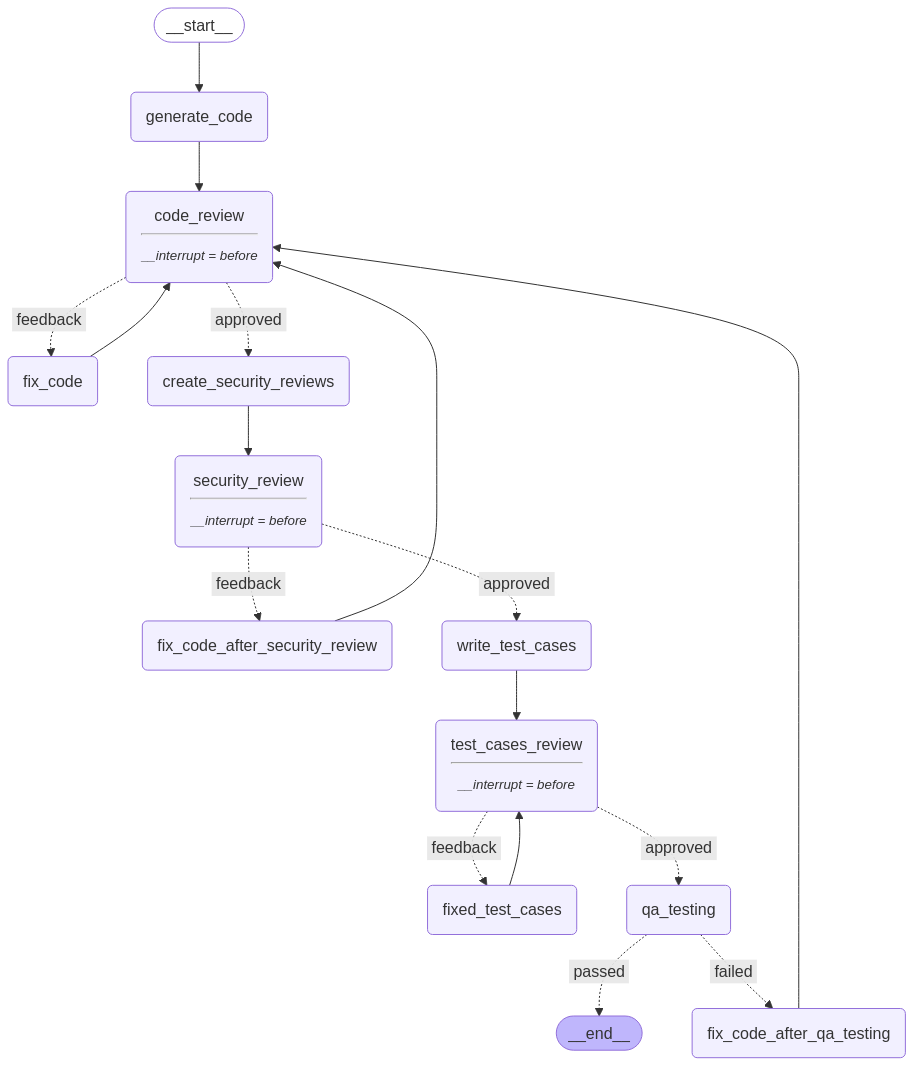

In [100]:
display(Image(code_workflow.get_graph().draw_mermaid_png()))

## frontend

In [85]:
initial_document_state = {
    "code_type" : "frontend",
    "frontend_status" : "in_progress",
    "backend_status" : "pending",
    "security_status" : "pending",
    "test_status" : "pending",
    "qa_status" : "pending",

    "revised_count" : 0,
    "frontend_code" : "",
    "backend_code" : "",

    "security_reviews" : [],
    "test_cases" : [],
    "qa_testings" : [],
  
    "frontend_messages" : [],
    "backend_messages" : [],
    "security_messages" : [],
    "test_messages" : [],
}

# Thread
thread = {"configurable": {"thread_id": "12"}}

state = None

for event in code_workflow.stream(initial_document_state, thread, stream_mode="values"):
    state = event

state

In generate_code


{'code_type': 'frontend',
 'frontend_status': 'pending_approval',
 'backend_status': 'pending',
 'security_status': 'pending',
 'test_status': 'pending',
 'qa_status': 'pending',
 'revised_count': 0,
 'frontend_code': '\n\'I\'ll help you create a basic e-commerce site using React, with features like product listing, cart functionality, and a checkout process.\n\n<boltArtifact id="ecommerce-site" title="E-commerce Site with React">\n<boltAction type="file" filePath="package.json">\n{\n  "name": "ecommerce-site",\n  "private": true,\n  "version": "0.0.0",\n  "type": "module",\n  "scripts": {\n    "dev": "vite",\n    "build": "vite build",\n    "preview": "vite preview"\n  },\n  "dependencies": {\n    "react": "^18.2.0",\n    "react-dom": "^18.2.0",\n    "react-router-dom": "^6.14.2",\n    "react-icons": "^4.10.1",\n    "@reduxjs/toolkit": "^1.9.5",\n    "react-redux": "^8.1.1",\n    "styled-components": "^6.0.4"\n  },\n  "devDependencies": {\n    "@types/react": "^18.2.15",\n    "@types/

In [86]:
document_state = code_workflow.get_state(thread) 
document_state.next

('code_review',)

In [87]:
# updated_state = code_workflow.update_state(thread, { "frontend_messages" : HumanMessage(content='Rephrase the frontend')})
code_workflow.update_state(thread, { "frontend_messages" : HumanMessage(content='Approved')})

# Continue the graph execution
for event in code_workflow.stream(None, thread, stream_mode="values"):
    state = event

state

In code_review
user feedback: approved
In should_fix_code


{'code_type': 'frontend',
 'frontend_status': 'completed',
 'backend_status': 'pending',
 'security_status': 'pending',
 'test_status': 'pending',
 'qa_status': 'pending',
 'revised_count': 0,
 'frontend_code': '\n\'I\'ll help you create a basic e-commerce site using React, with features like product listing, cart functionality, and a checkout process.\n\n<boltArtifact id="ecommerce-site" title="E-commerce Site with React">\n<boltAction type="file" filePath="package.json">\n{\n  "name": "ecommerce-site",\n  "private": true,\n  "version": "0.0.0",\n  "type": "module",\n  "scripts": {\n    "dev": "vite",\n    "build": "vite build",\n    "preview": "vite preview"\n  },\n  "dependencies": {\n    "react": "^18.2.0",\n    "react-dom": "^18.2.0",\n    "react-router-dom": "^6.14.2",\n    "react-icons": "^4.10.1",\n    "@reduxjs/toolkit": "^1.9.5",\n    "react-redux": "^8.1.1",\n    "styled-components": "^6.0.4"\n  },\n  "devDependencies": {\n    "@types/react": "^18.2.15",\n    "@types/react-d

# Backend

In [88]:
initial_document_state = {
    "code_type" : "backend",
    "backend_code" : "",
    "backend_status" : "in_progress",
    "backend_messages" : [],
    "revised_count" : 0
}

# Thread
for event in code_workflow.stream(initial_document_state, thread, stream_mode="values"):
    state = event

state

In generate_code


{'code_type': 'backend',
 'frontend_status': 'completed',
 'backend_status': 'pending_approval',
 'security_status': 'pending',
 'test_status': 'pending',
 'qa_status': 'pending',
 'revised_count': 0,
 'frontend_code': '\n\'I\'ll help you create a basic e-commerce site using React, with features like product listing, cart functionality, and a checkout process.\n\n<boltArtifact id="ecommerce-site" title="E-commerce Site with React">\n<boltAction type="file" filePath="package.json">\n{\n  "name": "ecommerce-site",\n  "private": true,\n  "version": "0.0.0",\n  "type": "module",\n  "scripts": {\n    "dev": "vite",\n    "build": "vite build",\n    "preview": "vite preview"\n  },\n  "dependencies": {\n    "react": "^18.2.0",\n    "react-dom": "^18.2.0",\n    "react-router-dom": "^6.14.2",\n    "react-icons": "^4.10.1",\n    "@reduxjs/toolkit": "^1.9.5",\n    "react-redux": "^8.1.1",\n    "styled-components": "^6.0.4"\n  },\n  "devDependencies": {\n    "@types/react": "^18.2.15",\n    "@types

In [89]:
document_state = code_workflow.get_state(thread) 
document_state.next

('code_review',)

In [90]:

# updated_state = code_workflow.update_state(thread, { "backend_messages" : HumanMessage(content='Rephrase the backend')})
code_workflow.update_state(thread, { "backend_messages" : HumanMessage(content='Approved')})

# Continue the graph execution
for event in code_workflow.stream(None, thread, stream_mode="values"):
    state = event

state

In code_review
user feedback: approved
In should_fix_code


{'code_type': 'backend',
 'frontend_status': 'completed',
 'backend_status': 'completed',
 'security_status': 'pending',
 'test_status': 'pending',
 'qa_status': 'pending',
 'revised_count': 0,
 'frontend_code': '\n\'I\'ll help you create a basic e-commerce site using React, with features like product listing, cart functionality, and a checkout process.\n\n<boltArtifact id="ecommerce-site" title="E-commerce Site with React">\n<boltAction type="file" filePath="package.json">\n{\n  "name": "ecommerce-site",\n  "private": true,\n  "version": "0.0.0",\n  "type": "module",\n  "scripts": {\n    "dev": "vite",\n    "build": "vite build",\n    "preview": "vite preview"\n  },\n  "dependencies": {\n    "react": "^18.2.0",\n    "react-dom": "^18.2.0",\n    "react-router-dom": "^6.14.2",\n    "react-icons": "^4.10.1",\n    "@reduxjs/toolkit": "^1.9.5",\n    "react-redux": "^8.1.1",\n    "styled-components": "^6.0.4"\n  },\n  "devDependencies": {\n    "@types/react": "^18.2.15",\n    "@types/react-

In [91]:
document_state = code_workflow.get_state(thread) 
document_state.next

('security_review',)

## Security Review

In [ ]:
# class CodeAndQAState(BaseModel):
#     code_type : Literal["frontend", "backend"] = "frontend"
#     frontend_status: Literal["pending", "in_progress", "pending_approval", "feedback", "completed"] = "pending"
#     backend_status: Literal["pending", "in_progress", "pending_approval", "feedback", "completed"] = "pending"
#     security_status : Literal["pending", "in_progress", "pending_approval", "feedback", "completed"] = "pending"
#     test_status : Literal["pending", "in_progress", "pending_approval", "feedback", "completed"] = "pending"
#     qa_status : Literal["pending", "in_progress", "pending_approval", "feedback", "completed"] = "pending"

#     revised_count : int = Field(default=0, description="The number of times the code has been revised")
#     frontend_code : str = Field(default = "", description="The frontend code")
#     backend_code : str = Field(default = "", description="The backend code")
    
#     security_reviews : List[SecurityReview] = []
#     test_cases : List[TestCase] = []
#     qa_testings : List[TestCase] = []

#     frontend_messages: Annotated[list, add_messages]
#     backend_messages: Annotated[list, add_messages]
#     security_messages: Annotated[list, add_messages]
#     test_messages: Annotated[list, add_messages]

In [ ]:
initial_document_state = {
    "security_reviews" : [],
    "security_status" : "in_progress",
    "security_messages" : [],
    "revised_count" : 0
}

# Thread
for event in code_workflow.stream(initial_document_state, thread, stream_mode="values"):
    state = event

state